In [1]:
from nltk.tokenize.casual import casual_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import pandas as pd
import string
import os
from timeit import default_timer as timer

np.random.seed=42

input_filepath="../../data/clean/"
pd.set_option('display.max_rows', 150)
filename="trisma2016_cleaned_text_by_lga_and_time_of_day.csv"

In [2]:
tweetdf=pd.read_csv(os.path.join(input_filepath, filename),header=0, keep_default_na=False)
docs = tweetdf[['lga','time_of_day','cleaned']][tweetdf.cleaned != '']
docs.columns = ['LGA','time_of_day','cleaned']
docs

,LGA,time_of_day,cleaned
0,Albury,afternoon,can't say if its personally directed me but wh...
1,Albury,evening,new year resolution find another job so you do...
2,Albury,morning,going to be smashing season this year good luc...
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...
6,Armidale Regional,morning,woohoo think there's also number of people exc...
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...
8,Ballina,afternoon,when my lil sister calls her close friends cou...
9,Ballina,evening,if you are feeling too positive about yourself...


In [3]:
# Set up Vectorizer for use with pre-cleaned and tokenized data
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def smc_tokeniser(doc):
    #return doc.split(' ')
    return [ps.stem(w) for w in doc.split(' ')]

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=smc_tokeniser,
    ngram_range=(1,3),
    max_features=500,
    stop_words='english',
    token_pattern=None)  

In [4]:
target_df = pd.read_csv(input_filepath+"filtered_nonlog_target.csv").iloc[:,1:]
target_df

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Armidale Regional,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
2,Ballina,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
3,Bathurst Regional,438.7931,462.3841,686.4989,200.5237,1184.2695,226.4738
4,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
5,Bega Valley,312.2606,341.7192,318.1524,153.1845,810.1102,153.1845
6,Bellingen,279.2213,263.7090,248.1967,116.3422,604.9794,93.0738
7,Berrigan,174.9883,139.9907,163.3224,81.6612,699.9533,279.9813
8,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380
9,Bland,348.2010,315.0390,281.8770,215.5530,746.1449,381.3630


In [5]:
# Only keep docs for target LGAs:
docs = docs.merge(target_df[['LGA']], on='LGA')
docs

,LGA,time_of_day,cleaned
0,Albury,afternoon,can't say if its personally directed me but wh...
1,Albury,evening,new year resolution find another job so you do...
2,Albury,morning,going to be smashing season this year good luc...
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...
6,Armidale Regional,morning,woohoo think there's also number of people exc...
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...
8,Ballina,afternoon,when my lil sister calls her close friends cou...
9,Ballina,evening,if you are feeling too positive about yourself...


In [6]:
# Expand targets to include time_of_day:
target_df = docs[['LGA','time_of_day']].merge(target_df, on='LGA')
target_df

,LGA,time_of_day,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,afternoon,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Albury,evening,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
2,Albury,morning,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
3,Albury,night,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
4,Armidale Regional,afternoon,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
5,Armidale Regional,evening,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
6,Armidale Regional,morning,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
7,Armidale Regional,night,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
8,Ballina,afternoon,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
9,Ballina,evening,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891


In [10]:
# SHUFFLE DOCS AND TARGETS IN PLACE PRESERVING GROUPS:
assert len(target_df) == len(docs)
indices = np.arange(len(target_df))
np.random.shuffle(indices.reshape((-1, 4))) # Keeps 4 times of day together
docs = docs.iloc[indices,:]
target_df = target_df.iloc[indices,:]
target_df

,LGA,time_of_day,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
264,Mid-Coast,afternoon,498.0535,431.7188,395.8329,274.0381,1041.7799,167.4678
265,Mid-Coast,evening,498.0535,431.7188,395.8329,274.0381,1041.7799,167.4678
266,Mid-Coast,morning,498.0535,431.7188,395.8329,274.0381,1041.7799,167.4678
267,Mid-Coast,night,498.0535,431.7188,395.8329,274.0381,1041.7799,167.4678
112,Cowra,afternoon,568.1370,694.3896,449.7751,244.6145,1554.4859,284.0685
113,Cowra,evening,568.1370,694.3896,449.7751,244.6145,1554.4859,284.0685
114,Cowra,morning,568.1370,694.3896,449.7751,244.6145,1554.4859,284.0685
115,Cowra,night,568.1370,694.3896,449.7751,244.6145,1554.4859,284.0685
16,Bayside,afternoon,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
17,Bayside,evening,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638


In [11]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold # Needed for aggregations

# X must be a dataframe whose last column is vector of text docs
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
# THE DATA IS ASSUMED TO BE SHUFFLED (PRESERVING GROUPS) PRIOR TO THIS METHOD BEING CALLED
def tfidf_cv(X, y, max_features=None, folds=5):
    assert len(X) == len(y)
    
    if not max_features:
        max_features = len(y)
    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    
    groups = np.arange(len(y)) // 4
    gkf = GroupKFold(n_splits=folds)
    for train_index, test_index in gkf.split(X, y, groups):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
        
        # Fit tfidf model for train:
        tfidf = TfidfVectorizer(analyzer='word',tokenizer=smc_tokeniser,ngram_range=(1,3),
                            max_features=max_features,stop_words='english',token_pattern=None)
        X_train = tfidf.fit_transform(X_train_df.iloc[:,-1])
        X_test = tfidf.transform(X_test_df.iloc[:,-1])
        features = np.array(tfidf.get_feature_names())
        
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        for f in range(len(indices)):
            importants[features[indices[f]]] += importances[indices[f]] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test)
        preds = pd.concat([preds,y_test_df])
        
        print('Finished processing',len(preds),'records...')

    return preds, importants

In [8]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def tfidf_metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=importants.get, reverse=True)[0:20]:
      print(w, importants[w])

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1]
    print('R2:',r2_score(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print('MAPE:',mape(y,pred))
    print('Mean APE Baseline:',mape(y,np.mean(y)))

    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()    

"grid search" on max features to test the boundaries of where overfitting begins. Uses only 3 folds for speed:

Finished processing 160 records...
Finished processing 320 records...
Finished processing 480 records...
Finished TF-IDF 3 fold cross validation in 571.0407852469943 seconds
MOST IMPORTANT FEATURES:
grass 0.113461712708
nsw 0.0960249067844
sydney 0.049451441984
dec 2016 0.0289762657356
advic bush 0.0243356279586
💗 0.0231038212403
way 0.0216697328462
rd 0.0202766856065
old 0.0201791807513
#bushfir #nswfire 0.0196735530876
got 0.0191324868482
wait 0.0183454577651
lol 0.017003727059
#nswrf 0.016326541228
park 0.0151568234695
nice 0.0144628155504
#nswfire 0.0141893203102
bush 0.01224995823
2016 0.0109256230813
love 0.0104636469162
R2: 0.0225004021086
RMSE: 289.962187581
MAPE: 57.3281655271
Mean APE Baseline: 72.0914035637


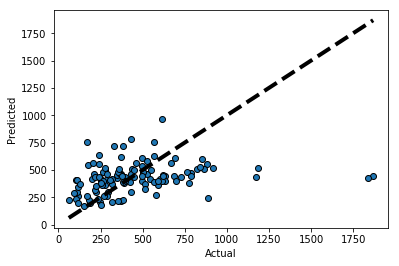

Finished processing 160 records...
Finished processing 320 records...
Finished processing 480 records...
Finished TF-IDF 3 fold cross validation in 562.7585567359347 seconds
MOST IMPORTANT FEATURES:
st 0.0733144679313
grass 0.0643619176538
nsw 0.0343879501679
sydney 0.029492881327
#sydney 0.0272813826319
dec 2016 0.0267288576929
west 0.0261830384281
hous 0.0181165539012
#grassfir 0.0172284020334
#grassfir #nswfire 0.015624142711
advic bush 0.0131571329413
#nswfire 0.0131314337963
#australia 0.0112899262558
rd 0.0112080231176
soon 0.00967496800349
way 0.00964093863099
music 0.00957115795083
advic 0.0090244684381
#nswrf #bushfir #nswfire 0.00872677668423
#nswfire advic bush 0.00872441730623
R2: 0.121005455392
RMSE: 274.964206835
MAPE: 57.894387565
Mean APE Baseline: 72.0914035637


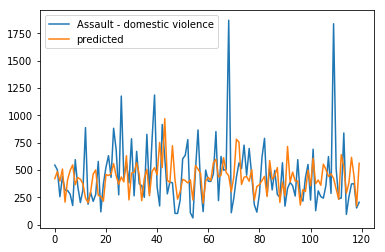

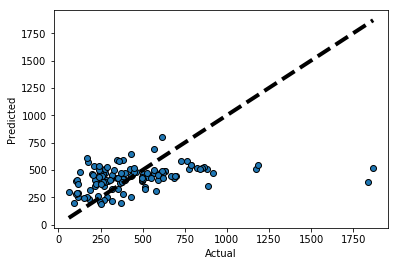

Finished processing 160 records...
Finished processing 320 records...
Finished processing 480 records...
Finished TF-IDF 3 fold cross validation in 556.7824661328923 seconds
MOST IMPORTANT FEATURES:
nsw 0.0457273853552
queen 0.0411494640067
st 0.0374270471542
plain 0.0355952895242
56 0.0326076680135
dec 2016 0.0251071284675
#sydney 0.024933272748
ridg 0.0151706588854
grass 0.0146294390267
plant 0.0140925934801
broken hill 0.0126319866376
sydney 0.0121446613333
heat 0.0117724762787
#nswrf #grassfir advic 0.0116798479249
#nswfire 0.00996862882374
univers 0.00991197073302
28 0.00966411922519
nov 2016 0.00891728447471
92 0.00884186930271
dec 0.00878327080528
R2: 0.0801135936041
RMSE: 281.287332401
MAPE: 58.3950543936
Mean APE Baseline: 72.0914035637


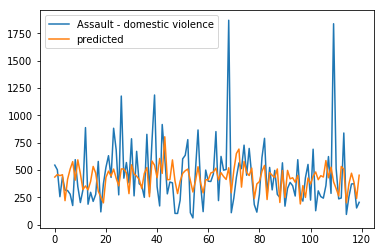

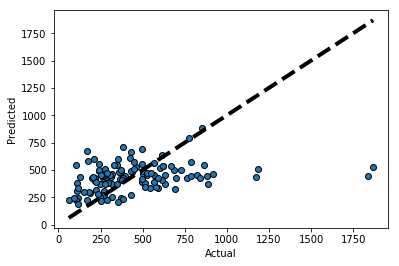

Finished processing 160 records...
Finished processing 320 records...
Finished processing 480 records...
Finished TF-IDF 3 fold cross validation in 552.000843816204 seconds
MOST IMPORTANT FEATURES:
nsw 0.0390421479573
ridg 0.0371620748809
sydney 0.0339869583031
92 0.0326865983235
2400 0.0326558230114
walgett 0.0295714984592
dec 2016 0.0275208237871
#grassfir #nswfire grass 0.0250248226313
lightn 0.0245918698414
st 0.0174408432388
#sydney 0.0156872441568
#australia 0.0141464390277
plain 0.0107495893312
rent 0.0103728007382
#nswfire 0.0103463867974
cobar 0.010065702892
#nswfire grass 0.00971012912291
28 0.00931024431065
rd 0.00914042279792
cloth 0.00894903195146
R2: 0.101859911028
RMSE: 277.942599343
MAPE: 55.7280773682
Mean APE Baseline: 72.0914035637


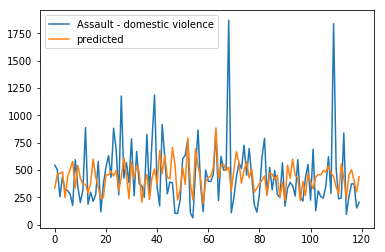

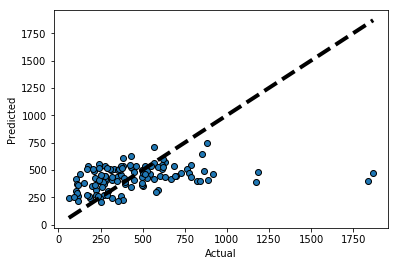

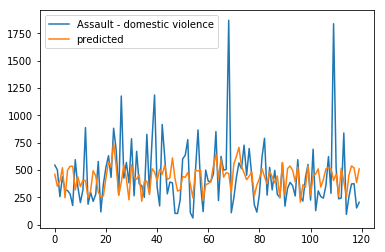

In [12]:
for f in [200,500,2000,5000]:
    start = timer()
    predictions, importants = tfidf_cv(docs, target_df[['LGA','time_of_day','Assault - domestic violence']], max_features=f, folds=3)
    end = timer()
    print('Finished TF-IDF 3 fold cross validation in',end-start,'seconds')
    # Need to aggregate preds from time_of_day back up to LGA level:
    predictions = predictions[['LGA','time_of_day','Assault - domestic violence',
                               'predicted']].groupby(['LGA']).agg({'Assault - domestic violence': lambda x: np.mean(x),
                                                                  'predicted': lambda x: np.mean(x)}).reset_index()
    tfidf_metrics(predictions, importants)
    # Just do a default pandas plot as well...
    predictions.plot()

Run an analysis on all 6 target variables. Store the results for later use in other models:

Assault - domestic violence
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 990.7338556861505 seconds
MOST IMPORTANT FEATURES:
plain 0.0816269892619
ridg 0.0667342347389
nsw 0.0360710117892
st 0.0352416241035
heat 0.031705825506
56 0.0300049562473
92 0.029240906831
lightn 0.0265601770988
walgett 0.0229159718019
#sydney 0.0168023819422
grass 0.0163145369424
#nswrf 0.0150421693302
sydney 0.0133701365382
glen inn 0.0132332710227
#nswfire grass 0.0132187517781
28 dec 0.0115233917607
coonambl 0.0111698700586
#grassfir 0.0103860605505
#australia 0.0101073333568
nov 2016 0.00934841456155
R2: 0.148676930284
RMSE: 270.601546971
MAPE: 55.5826369471
Mean APE Baseline: 72.0914035637


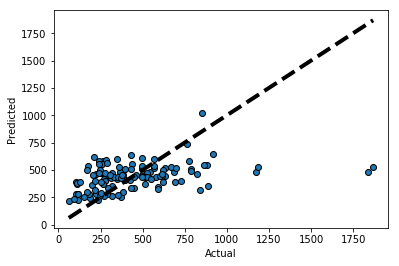

Assault - non-domestic violence
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 1005.4976996160112 seconds
MOST IMPORTANT FEATURES:
st 0.0453763342335
sydney 0.0356710145858
#sydney 0.0353968694659
ridg 0.0341675239136
plain 0.0273978829391
grass 0.0258277018609
walgett 0.024225757987
heat 0.0205888173001
#marooncrusad #18thman 0.0186812836917
coonambl 0.0180397956864
dec 2016 0.0129105021128
#bronxnat #bbtid 0.0124099491806
lightn 0.0112447615458
corey 0.0111930168783
#nswfire grass 0.0109339160682
#marooncrusad 0.0103684450105
#gotheroo #greenandgoldprid 0.0098189039441
#bushfir #nswfire advic 0.00952746308628
narromin 0.00949624523013
#broncosst 0.0090035418378
R2: 0.0395903628985
RMSE: 238.24443895
MAPE: 49.7481093361
Mean APE Baseline: 59.8326771602


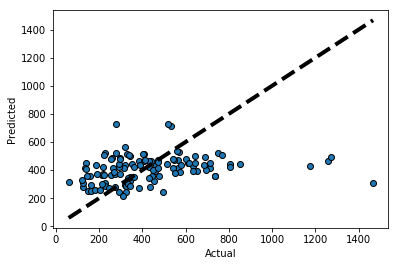

Fraud
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 1007.4096025349572 seconds
MOST IMPORTANT FEATURES:
#marooncrusad #18thman 0.0440538418603
abi 0.0404750579036
#gotheroo #greenandgoldprid 0.0324347070491
sen 0.0321563630219
bu 0.0316960067464
#marooncrusad 0.0267301715906
#marooncrusad #18thman #qlder 0.02189946109
#decadeofdomin #marooncrusad 0.0216817401437
#nswrf 0.0213637728664
io 0.0202555970772
#sydney 0.0198277744443
#bronxnat #bbtid 0.0195356578074
ama 0.0176002304854
bir 0.0154663005175
ne 0.0141877100477
en 0.0138883987705
corey 0.0127343354377
2016 0.0124253628925
#bbtid #broncosst 0.0123650483708
dariu boyd 0.0117104769544
R2: 0.217928635735
RMSE: 255.757067143
MAPE: 37.940435558
Mean APE Baseline: 50.564378615


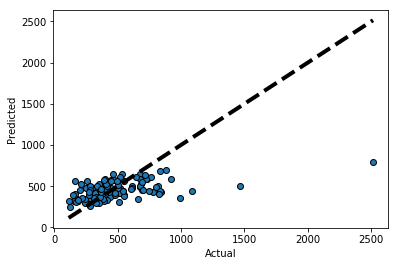

Sexual Offences
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 1000.5762227210216 seconds
MOST IMPORTANT FEATURES:
#sydney 0.176999221767
goat 0.0406058330095
sydney 0.0291675723815
plain 0.0260548333773
dec 2016 0.0229623248192
nsw 0.0222070439898
#nswfire 0.016458006662
heat 0.014121357937
#nswrf 0.0119469101639
st 0.0111750196707
22.6 0.00890919492982
centuri 21 0.00886338341072
#grassfir #nswfire 0.00777726619247
richmond valley 0.00775808730147
nsw centuri 0.00775575811006
yr 0.00665891028716
#bushfir 0.00612786052948
southern 0.00598821987405
area 0.00595764504458
plant 0.00533091274151
R2: 0.212532052817
RMSE: 82.8393200988
MAPE: 40.4345654925
Mean APE Baseline: 53.0821806583


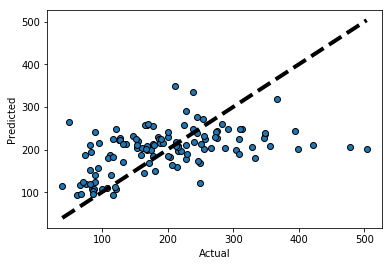

Malicious damage to property
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 986.4402211820707 seconds
MOST IMPORTANT FEATURES:
plain 0.0874897924272
ridg 0.0490355102378
#sydney 0.0437922705952
st 0.0354547112264
heat 0.0343621651354
#nswfire grass 0.0276978862615
grass 0.0274883754984
lightn 0.024489259187
coonambl 0.0219842229305
rent 0.0213494654742
#nswfire 0.0209542246147
92 0.0205558618362
#grassfir 0.0159372897957
dec 2016 0.0155762391255
#nswrf advic bush 0.0154119912203
nsw 0.0149551403298
#nswrf 0.0140730747537
sydney 0.0115915727145
#agchatoz 0.00997987590232
nov 2016 0.00906880841103
R2: 0.0612516112817
RMSE: 555.045545032
MAPE: 41.542344302
Mean APE Baseline: 53.4238936165


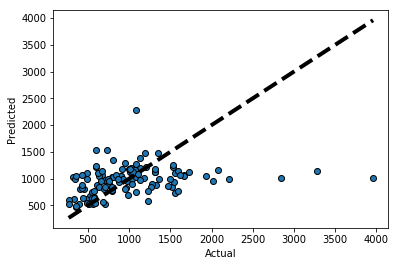

Prohibited weapons offences
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 977.5325694030616 seconds
MOST IMPORTANT FEATURES:
#sydney 0.163449588271
nsw 0.0700277164107
st 0.0412783545808
drive 0.0274034027231
#nswrf 0.0208498550658
#grassfir #nswfire 0.0177644664409
grass 0.0171589933482
wagga 0.0164242238815
#nswfire grass 0.0160175964938
2016 0.0150488997132
dec 2016 0.00918359522895
#grassfir #nswfire grass 0.00835535438473
you'r 0.0074153727761
heat 0.00641314845137
sydney 0.00579160486036
twitter 0.00556657873621
harvest 0.00527228758217
opal 0.0051342706602
june 0.00503934926779
god 0.00493429764224
R2: 0.261388918836
RMSE: 128.195167128
MAPE: 81.5458041264
Mean APE Baseline: 126.659859832


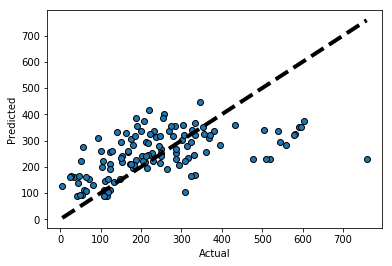

In [13]:
# 5000 max feat definitely better than 500 and reasonably quick.
# 5k seems to be about the right number.
tfidf_output = pd.DataFrame()
for target in target_df.columns[2:]: # Start from 2 as we have a 2 column index
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA','time_of_day',target]], max_features=5000, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    # Need to aggregate preds from time_of_day back up to LGA level:
    preds = preds[['LGA','time_of_day',target,
                    'predicted']].groupby(['LGA']).agg({target: lambda x: np.mean(x),
                                                    'predicted': lambda x: np.mean(x)}).reset_index()
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [14]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_and_time_of_day_2016_rfr_preds.csv",index=False)

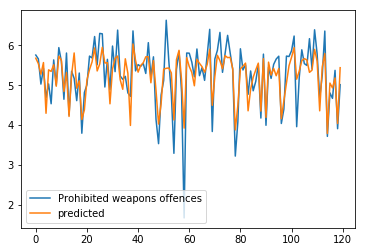

In [25]:
preds.plot()